# Group: Rui Zhao, Qianli Wang, Nazar Sopiha

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

First of all: we are going to introduce a dataset on that we apply our clustering method on:

In [78]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    epsilon = 0.1
    n = (np.random.rand(n_points,1)+epsilon) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise

    # hstack/vstack stacks data on top of each other (print shape to see what I mean)
    C_1 = np.hstack((d1x,d1y))
    C_2 = np.hstack((-d1x,-d1y))
    return np.vstack((C_1, C_2))

This is a dataset consisting of clusters twisting around each other. You don't need to understand the mathematics behind it, but you can play around with it if you like (make sure to train on the original dataset, not one you created)



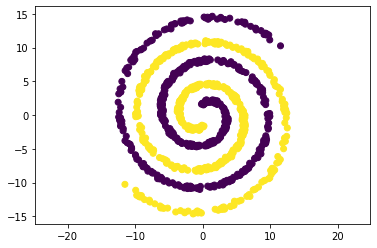

In [79]:
data_size = 500

dataset = twospirals(data_size)
labels = np.hstack((np.zeros(data_size),np.ones(data_size)))

# scatter makes a 2D scatter plot. Unfortunately you have to seperate the x-dim from the y-dim
# the labels are helpful for coloring. The algorithm does not use them, since this is unsupervised
plt.scatter(dataset[:,0], dataset[:,1], c = labels)
plt.axis('equal')
plt.show()

a) Implement the DBSCAN algorithm to classify points of the two clusters.

b) Plot a scatter plot highlighting the clusters that were found after finding good hyperparameter values eps and minPts.

c) Print accuracies for different data_size values.

d) For what kind of data_size values does the algorithm fail and why? What would you say are disadvantages of DBSCAN?

In [80]:
import sys 
  
# the setrecursionlimit function is 
# used to modify the default recursion 
# limit set by python. Using this,  
# we can increase the recursion limit 
# to satisfy our needs 
  
sys.setrecursionlimit(10**6) 

In [81]:
# this class record visit list
class visitlist:
    def __init__(self, count=0):
        # record unvisited points
        self.unvisitedlist = [i for i in range(count)]
        # record visited points
        self.visitedlist = list()
        self.unvisitednum = count
        
    def visit(self, point):
        self.visitedlist.append(point)
        self.unvisitedlist.remove(point)
        self.unvisitednum -= 1

In [82]:
# I changed the axis to 0, to calculate the distance between two points
def euclidean_distance(x_1, x_2):
      return np.sqrt(np.sum((x_1-x_2)**2, axis = 0)) 

# return the Neighbours of p
def rangeQuery(p, eps):
    number_Points = dataset.shape[0]
    return [i for i in range(number_Points) if euclidean_distance(dataset[i], dataset[p])<=eps]

def dbscan(dataset, eps, minPts):
    # total number of points
    number_Points = dataset.shape[0]
    visit_Points = visitlist(count=number_Points)
    # initialize the cluster, the cluster label is k
    k = -1
    Cluster = [-1 for i in range(number_Points)]
    while(visit_Points.unvisitednum > 0):
        # randomly select an unvisited point
        point = random.choice(visit_Points.unvisitedlist)
        visit_Points.visit(point)
        Neighbours = rangeQuery(point, eps)
        # at least MinPoints in the neighborhood
        if len(Neighbours) >= minPts:
            k += 1
            Cluster[point] = k
            for point1 in Neighbours:
                if point1 in visit_Points.unvisitedlist:
                    visit_Points.visit(point1)
                    # If there are at least MinPts points 
                    # in the neighborhood of point1, 
                    # add these points to N
                    newN = rangeQuery(point1, eps)
                    if len(newN) >= minPts:
                        for i in newN:
                            if i not in Neighbours:
                                Neighbours.append(i)
                    # if point1 is not yet a member of any cluster, add Point1 to Cluster
                    if Cluster[point1] == -1:
                        Cluster[point1] = k                
        # else noise point 
        else:
            Cluster[point] = -1
    # Until all points have been visited
    return Cluster

## Task a

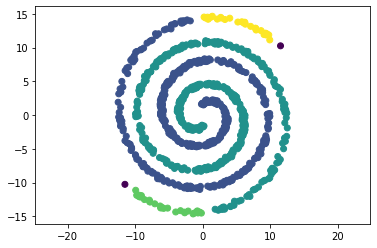

In [83]:
# optimal values:
# eps = 1.8         
# minPoints = 3

eps = 1.8         
minPoints = 3
Cluster = dbscan(dataset, eps, minPoints)

plt.scatter(dataset[:,0], dataset[:,1], c = Cluster)
plt.axis('equal')
plt.show()

## Task b
##### Accuracy is almost always above 90%, especially if the data size is greater than 500.
##### When the data size is greater than 1000, the accuracy is almost 100%.
##### Accuracy fluctuates (mostly when the data size is too small), this is because the data is randomly generated

In [84]:
def accuracy_new(label, datasize):
    label_0 = 0
    label_1 = 0
    for i in label:
        if i == 0:label_0 += 1
        if i == 1:label_1 += 1
    return((label_0+label_1)/(2*datasize))

print("Accuracy:",accuracy_new(Cluster, data_size)*100,"%")


Accuracy: 93.8 %


## Task c

In [ ]:
# balabala..